In [0]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [0]:
import numpy as np
import pandas as pd
import nltk

In [0]:
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model, Model
import keras.backend as K
import numpy as np

import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

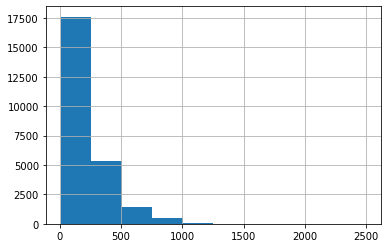

count    25000.000000
mean       238.713640
std        176.497204
min         11.000000
25%        130.000000
50%        178.000000
75%        291.000000
max       2494.000000
dtype: float64

In [19]:
reviews_len = [len(x) for x in X_train]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [0]:
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [36]:
from keras.models import Sequential
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                35800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 675,851
Trainable params: 675,851
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model.fit(X_train, y_train, epochs=2, batch_size=128)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
25000/25000 [==============================] - 168s 7ms/step - loss: 0.4835 - accuracy: 0.7683
Epoch 2/2
25000/25000 [==============================] - 168s 7ms/step - loss: 0.2870 - accuracy: 0.8857


In [40]:
scores,acc = model.evaluate(X_test, y_test, batch_size=128)

25000/25000 [==============================] - 46s 2ms/step


In [42]:
print(scores)
print(acc)

0.3454533456087112
0.8543199896812439
